In [27]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('young messi.jpeg', 0)  #reading image in grayscale

In [28]:
def ideal_high_pass_filter(img, D0):
    rows, cols = img.shape
    crow, ccol = rows // 2 , cols // 2
    
        #Performing Fourier Transform
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    
        #creating ideal high pass filter  
    mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i-crow)**2 + (j-ccol)**2) <= D0:
                mask[i, j] = 0
    
        #applying the mask
    filtered_dft_shift = dft_shift * mask
    
    #now inversing fft
    filtered_dft = np.fft.ifftshift(filtered_dft_shift)
    filtered_img = np.fft.ifft2(filtered_dft)
    filtered_img = np.abs(filtered_img)
    
    return filtered_img


def butterworth_high_pass_filter(img,D0,n):
    rows, cols = img.shape
    crow, ccol = rows // 2 , cols // 2
    
        #Performing Fourier Transform
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    
    #creating butterworth high pass filter
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i-crow)**2 + (j-ccol)**2)
            if distance == 0:
                mask[i, j] = 0
            else:
                mask[i, j] = 1 / (1 + (D0 / distance)**(2 * n))
    
    #applying mask
    filtered_dft_shift = dft_shift * mask
    
    #performing inverse fft
    filtered_dft = np.fft.ifftshift(filtered_dft_shift)
    filtered_img = np.fft.ifft2(filtered_dft)
    filtered_img = np.abs(filtered_img)
    
    return filtered_img


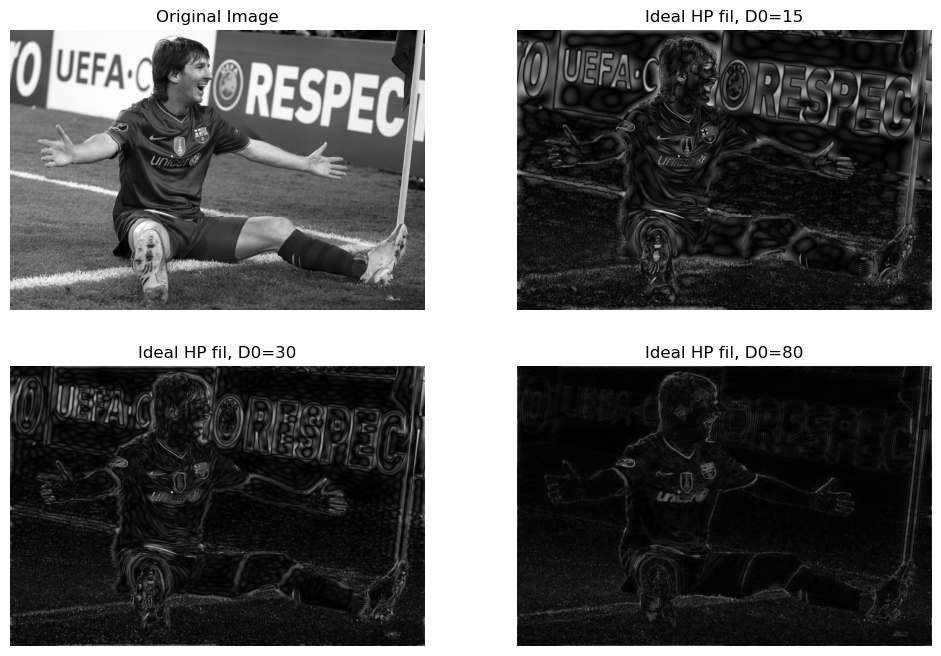

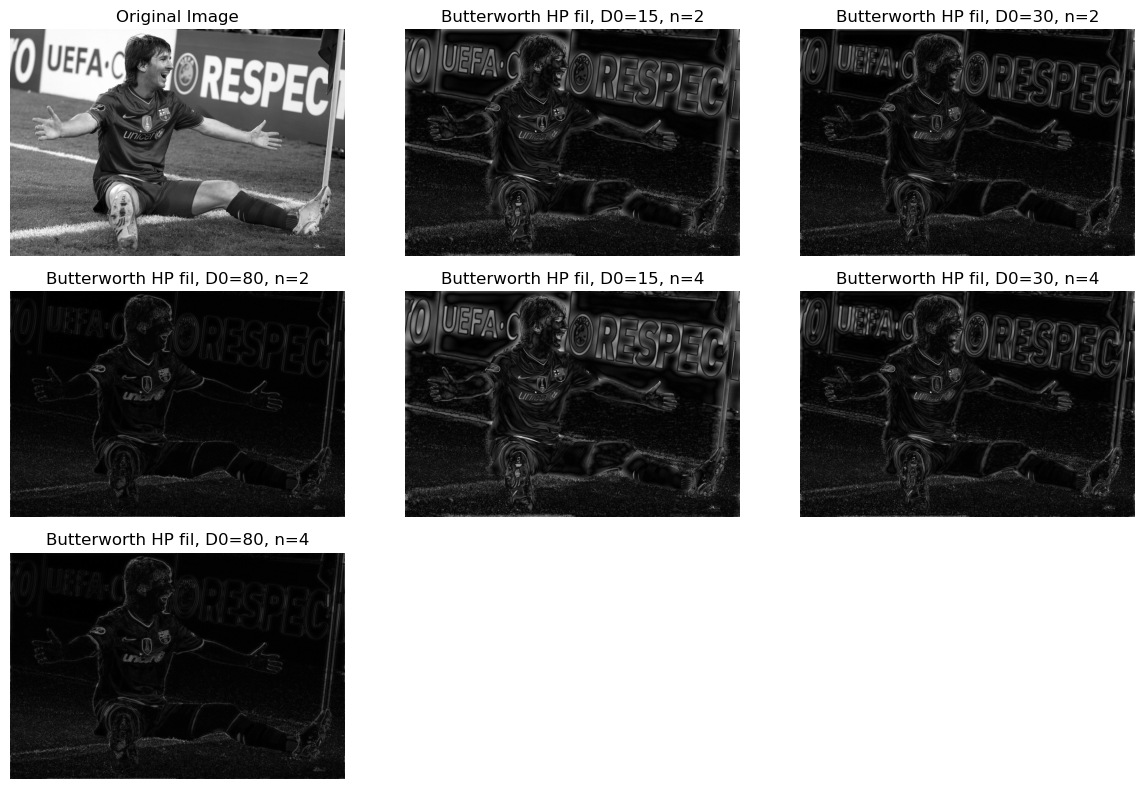

<Figure size 640x480 with 0 Axes>

In [29]:
D0_values = [15, 30, 80] #Provided Cutoff frequencies

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

#IDEAL HP FILTER
for i, D0 in enumerate(D0_values, 2):
    filtered_img = ideal_high_pass_filter(img, D0)
    plt.subplot(2, 2, i), plt.imshow(filtered_img, cmap='gray')
    plt.title(f'Ideal HP fil, D0={D0}'), plt.axis('off')

orders = [2, 4]
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

#BUTTERWORTH HP FILTER
subplot_index = 2
for order in orders:
    for D0 in D0_values:
        filtered_img = butterworth_high_pass_filter(img, D0, order)
        plt.subplot(3, 3, subplot_index), plt.imshow(filtered_img, cmap='gray')
        plt.title(f'Butterworth HP fil, D0={D0}, n={order}'), plt.axis('off')
        subplot_index += 1

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()